# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
import numpy as np

print(f"x_train.shape = {x_train.shape}, and y_train.shape = {y_train.shape}")
print(f"number of classes = {len(set(np.squeeze(y_train, axis=-1)))}")

x_train.shape = (50000, 32, 32, 3), and y_train.shape = (50000, 1)
number of classes = 100


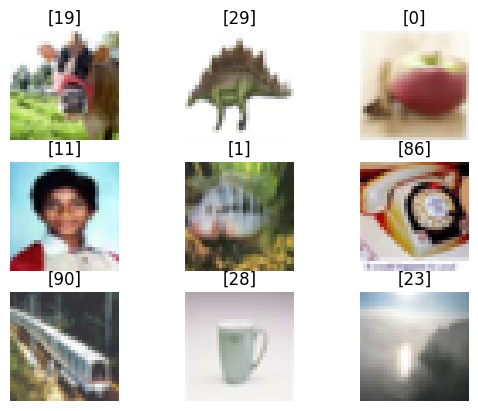

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_axis_off()
    ax.set_title(f"{y_train[i]}")

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Normalize images
x_train = (x_train.astype(np.float64)) / 255.0
x_test = (x_test.astype(np.float64)) / 255.0

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Encode labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(y_train)
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from keras import Sequential, Input, Layer
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalMaxPool2D, Dense, Dropout

In [7]:
model = Sequential(name='my_cnn')

# Input layer
model.add(Input((32,32,3), name='input_layer'))

# Convolution block 1
model.add(Conv2D(4, (3,3), padding='same', activation='relu', name='conv_1_1'))
model.add(Conv2D(4, (3,3), padding='same', activation='relu', name='conv_1_2'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_1'))

# Convolution block 2
model.add(Conv2D(16, (3,3), padding='same', activation='relu', name='conv_2_1'))
model.add(Conv2D(16, (3,3), padding='same', activation='relu', name='conv_2_2'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_2'))

# Convolution block 3
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_1'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_2'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_3'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_3'))

# Global pooling
model.add(GlobalMaxPool2D())

# Hidden layer
model.add(Dense(256, activation='relu', name='hidden_layer'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(100, activation='softmax', name='output_layer'))
model.summary()

Model: "my_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1_1 (Conv2D)                    │ (None, 32, 32, 4)           │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1_2 (Conv2D)                    │ (None, 32, 32, 4)           │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_1 (MaxPooling2D)         │ (None, 16, 16, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_1 (Conv2D)                    │ (None, 16, 16, 16)          │             592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_2 (Conv2D)                    │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_2 (MaxPooling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_1 (Conv2D)                    │ (None, 8, 8, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_3 (MaxPooling2D)         │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,648 (502.53 KB)

 Trainable params: 128,648 (502.53 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Since there is 100 categories, CategoricalCrossentropy is good choice for our loss.
- <b>Optimizer:</b> Since Adam is numerically stable, and automatically adjusts the learning rate, it's a good first optimizer choice.

In [8]:
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.optimizers import Adam

In [9]:
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [10]:
# Stops training when validation loss stops improving
from keras.callbacks import EarlyStopping

In [11]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    callbacks=[EarlyStopping(patience=10)],
    validation_split=0.2
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - categorical_accuracy: 0.0184 - loss: 4.4812 - val_categorical_accuracy: 0.0562 - val_loss: 4.1079
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.0773 - loss: 3.9768 - val_categorical_accuracy: 0.1290 - val_loss: 3.6818
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.1384 - loss: 3.6159 - val_categorical_accuracy: 0.1716 - val_loss: 3.4767
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.1748 - loss: 3.3993 - val_categorical_accuracy: 0.1877 - val_loss: 3.3696
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.2010 - loss: 3.2742 - val_categorical_accuracy: 0.2098 - val_loss: 3.2581
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.2191 - loss: 3.1762 - val_categorical_accuracy: 0.2226 - val_loss: 3.2051
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 28.8%
- <b>Other metric:</b> CategoricalCrossentropy
- <b>Reason for selection:</b> Measures the confidence in our model prediction.
- <b>Value of metric:</b> 12.9
- <b>Interpretation of metric value:</b> We see that the categorical cross entropy is quite high. This suggests our model is not very confident. That is, our model is not labeling our images with confidence.

In [12]:
from keras.metrics import CategoricalCrossentropy as Entropy

In [13]:
def get_results(model, x_test, y_test, metrics):
    results = {}
    for name, metric in metrics.items():
        metric.update_state(model(x_test), y_test)
        results[name] = metric.result()
    return results

metrics = {
    'categorical_crossentropy': Entropy(),
    'categorical_accuracy': CategoricalAccuracy()
}

In [14]:
results = get_results(model, x_test, y_test, metrics)
for name, result in results.items():
    print("{}: {:.3f}".format(name, result))

categorical_crossentropy: 12.908
categorical_accuracy: 0.288


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [15]:
def plot_history(history, *args):
    fig, ax = plt.subplots()
    for arg in args:
        ax.plot(history.history[arg], label=f"{arg}")

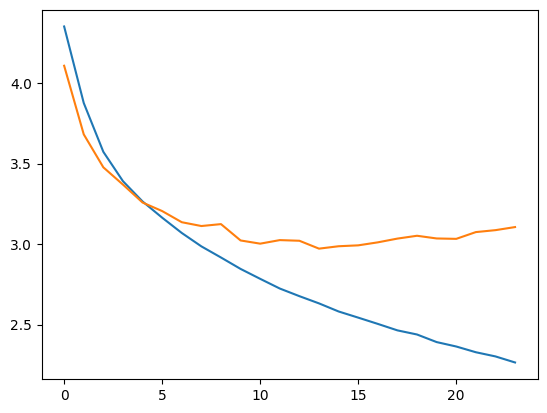

In [16]:
plot_history(history, 'loss', 'val_loss')

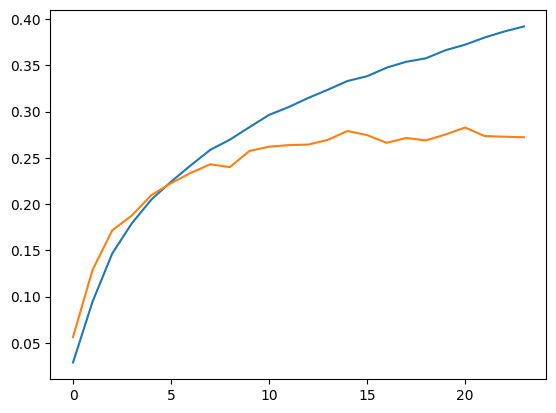

In [17]:
plot_history(history, 'categorical_accuracy', 'val_categorical_accuracy')

In [18]:
def correct_label_indexes(model, x, y):
    """
    Returns a list of indexes from the  that are labelled correctly.
    """
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    pred = np.expand_dims(pred, axis=-1)
    pred = one_hot_encoder.transform(pred)
    correct_idexes = []
    for i, (u, v) in enumerate(zip(y_test, pred)):
        if (np.dot(u,v)):
            correct_idexes.append(i)
    return correct_idexes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


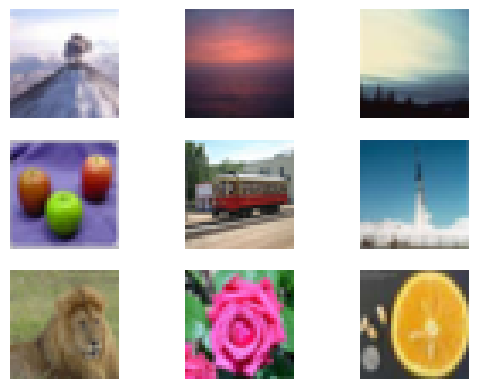

In [19]:
correct_indexes = correct_label_indexes(model, x_test, y_test)
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[correct_indexes[i]])
    ax.set_axis_off()

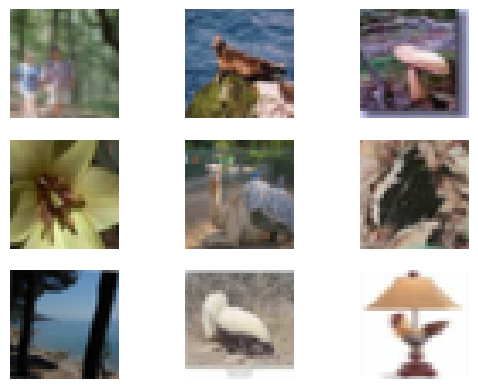

In [20]:
wrong_indexes = list(set(range(len(x_train))) - set(correct_indexes))
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[wrong_indexes[i]])
    ax.set_axis_off()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [21]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [22]:
class DataAugmentation(Layer):

    """
    DataAugmentation groups together several data augmentation layers together.
    """

    def __init__(self, seed=0):
        super(DataAugmentation, self).__init__(name='data_augmentation_layer')
        self.random_flip = RandomFlip(seed=seed)
        self.random_rotation = RandomRotation(0.05, value_range=(0.0,1.0), seed=seed)
        self.random_zoom = RandomZoom(0.1, seed=seed)

    def call(self, inputs):
        z = self.random_flip(inputs)
        z = self.random_rotation(z)
        return self.random_zoom(z)

In [23]:
model = Sequential(name='my_enhanced_cnn')

# Input layer
model.add(Input((32,32,3), name='input_layer'))

# Data augmentation
model.add(DataAugmentation())

# Convolution block 1
model.add(Conv2D(4, (3,3), padding='same', activation='relu', name='conv_1_1'))
model.add(Conv2D(4, (3,3), padding='same', activation='relu', name='conv_1_2'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_1'))

# Convolution block 2
model.add(Conv2D(16, (3,3), padding='same', activation='relu', name='conv_2_1'))
model.add(Conv2D(16, (3,3), padding='same', activation='relu', name='conv_2_2'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_2'))

# Convolution block 3
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_1'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_2'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu', name='conv_3_3'))
model.add(MaxPooling2D(strides=2, pool_size=(2,2), name='max_pooling_3'))

# Global pooling
model.add(GlobalMaxPool2D())

# Hidden layer
model.add(Dense(256, activation='relu', name='hidden_layer'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(100, activation='softmax', name='output_layer'))
model.summary()

Model: "my_enhanced_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_augmentation_layer              │ (None, 32, 32, 3)           │               0 │
│ (DataAugmentation)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1_1 (Conv2D)                    │ (None, 32, 32, 4)           │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1_2 (Conv2D)                    │ (None, 32, 32, 4)           │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_1 (MaxPooling2D)         │ (None, 16, 16, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_1 (Conv2D)                    │ (None, 16, 16, 16)          │             592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_2 (Conv2D)                    │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_2 (MaxPooling2D)         │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_1 (Conv2D)                    │ (None, 8, 8, 64)            │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling_3 (MaxPooling2D)         │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer (Dense)                 │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,648 (502.53 KB)

 Trainable params: 128,648 (502.53 KB)

 Non-trainable params: 0 (0.00 B)

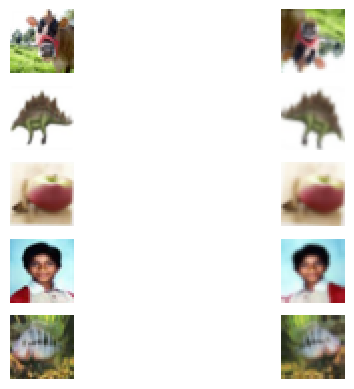

In [24]:
data_aug = DataAugmentation()
fig, axes = plt.subplots(5,2)
for i in range(0,5):
    axes[i,0].imshow(x_train[i])
    axes[i,0].set_axis_off()
    axes[i,1].imshow(data_aug(x_train[i]))
    axes[i,1].set_axis_off()

In [25]:
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy()]
)

In [26]:
import os
from keras.callbacks import ModelCheckpoint

# Make callbacks directory
if not(os.path.exists('callbacks')):
    os.mkdir('callbacks')

model_ckpt = ModelCheckpoint(
    os.path.join('callbacks', 'best_model.keras'),
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None
)

In [28]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    callbacks=[EarlyStopping(patience=20), model_ckpt], # Remark: added more patience
    validation_split=0.2,
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - categorical_accuracy: 0.0192 - loss: 4.4743 - val_categorical_accuracy: 0.0444 - val_loss: 4.1901
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.0476 - loss: 4.1574 - val_categorical_accuracy: 0.0806 - val_loss: 3.9999
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.0861 - loss: 3.9130 - val_categorical_accuracy: 0.1227 - val_loss: 3.6761
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.1241 - loss: 3.6859 - val_categorical_accuracy: 0.1411 - val_loss: 3.5771
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.1423 - loss: 3.5523 - val_categorical_accuracy: 0.1632 - val_loss: 3.4236
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_accuracy: 0.1617 - loss: 3.4493 - val_categorical_accuracy: 0.1625 - val_loss: 3.4792
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - categorical_

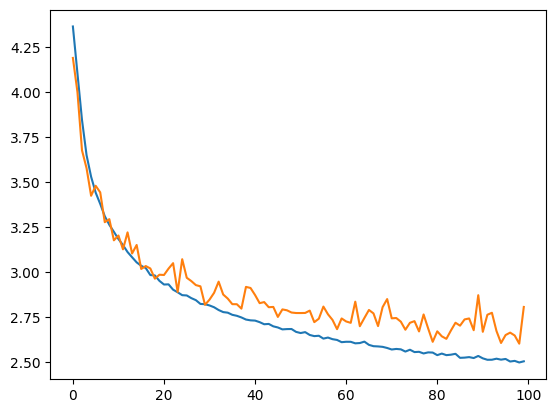

In [29]:
plot_history(history, 'loss', 'val_loss')

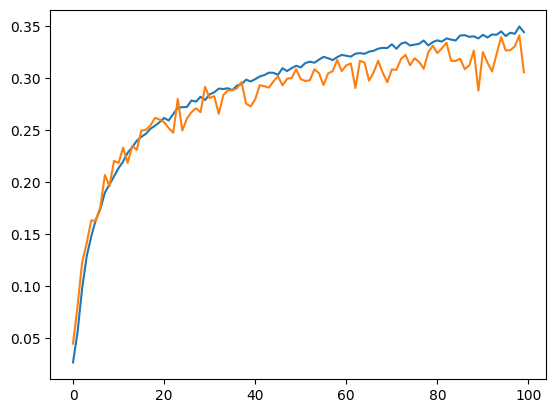

In [30]:
plot_history(history, 'categorical_accuracy', 'val_categorical_accuracy')

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [33]:
for name, result in get_results(model, x_test, y_test, metrics).items():
    print("{}: {:.3f}".format(name, result))

categorical_crossentropy: 12.901
categorical_accuracy: 0.301


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


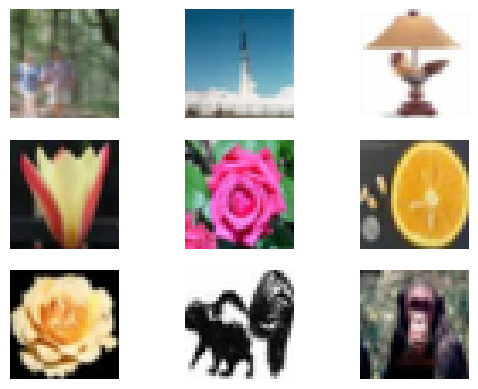

In [34]:
correct_indexes = correct_label_indexes(model, x_test, y_test)
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[correct_indexes[i]])
    ax.set_axis_off()

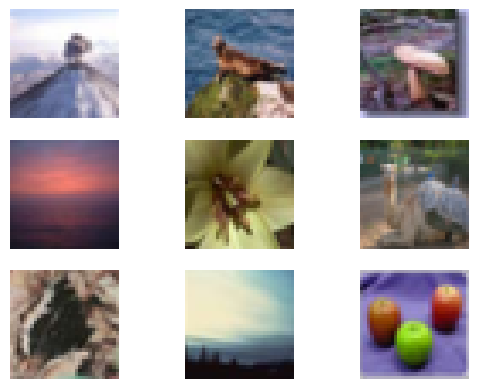

In [35]:
wrong_indexes = list(set(range(len(x_train))) - set(correct_indexes))
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[wrong_indexes[i]])
    ax.set_axis_off()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

The results show that with data augmentation, our model was able overcome over fitting and continue to improve with respect to our loss, and accuracy metric. This demostrates the significance of large data sets when training models with a large number of trainable parameters. Our enhanced model achieved 30.1% accuracy (unfortunately I was unable to achieve the required 55% accuracy). I'm not sure if there is room for improvement with the techniques used in this experiment. In the future, we should try a model with more convolutional layers, and more problem specific data augmentation strategies.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.